In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("cancer_classification(1).csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

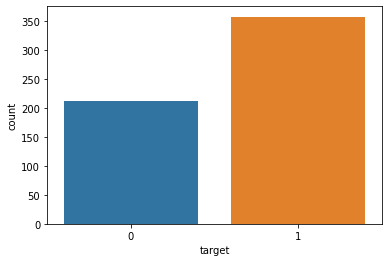

In [6]:
sns.countplot(x="target",data=df)

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:, -1].values

In [9]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)


In [13]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest))

Epoch 1/600
13/13 [==============================] - 1s 18ms/step - loss: 0.5898 - val_loss: 0.4818
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3918 - val_loss: 0.3503
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2815 - val_loss: 0.2763
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2150 - val_loss: 0.2311
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1743 - val_loss: 0.1973
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1446 - val_loss: 0.1732
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1244 - val_loss: 0.1557
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1093 - val_loss: 0.1420
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0978 - val_loss: 0.1305
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 0.1228
Epoch 11

In [14]:
model.history.history

{'loss': [0.5898066163063049,
  0.3918284773826599,
  0.28147807717323303,
  0.21498920023441315,
  0.1743127405643463,
  0.1446470469236374,
  0.12444908171892166,
  0.10933122783899307,
  0.09775517135858536,
  0.08791666477918625,
  0.08090023696422577,
  0.07441046088933945,
  0.06936510652303696,
  0.06499642878770828,
  0.061417341232299805,
  0.058039210736751556,
  0.05544121563434601,
  0.05294078215956688,
  0.050504740327596664,
  0.04861035570502281,
  0.04672522097826004,
  0.04459597170352936,
  0.04359596222639084,
  0.041673943400382996,
  0.04027028754353523,
  0.038866959512233734,
  0.037502631545066833,
  0.036180946975946426,
  0.03499380126595497,
  0.034279800951480865,
  0.032799214124679565,
  0.0321248322725296,
  0.030741015449166298,
  0.030170250684022903,
  0.0287989042699337,
  0.027819020673632622,
  0.027045750990509987,
  0.02595522813498974,
  0.025133652612566948,
  0.024375416338443756,
  0.023538319393992424,
  0.022984765470027924,
  0.02195229381

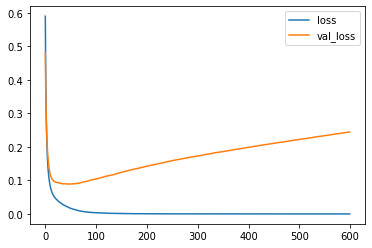

In [15]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [16]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [18]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 1s 14ms/step - loss: 0.6475 - val_loss: 0.5383
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4540 - val_loss: 0.4087
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3390 - val_loss: 0.3232
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2660 - val_loss: 0.2629
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2139 - val_loss: 0.2214
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1782 - val_loss: 0.1910
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1523 - val_loss: 0.1689
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1330 - val_loss: 0.1516
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1178 - val_loss: 0.1383
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 0.1279
Epoch 11

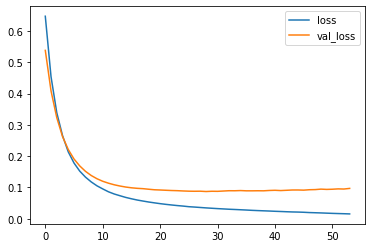

In [19]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [20]:
from tensorflow.keras.layers import Dropout

In [21]:

model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

In [22]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 2s 15ms/step - loss: 0.7885 - val_loss: 0.5852
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6290 - val_loss: 0.4988
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5783 - val_loss: 0.4456
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5479 - val_loss: 0.4027
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4794 - val_loss: 0.3656
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4920 - val_loss: 0.3368
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4658 - val_loss: 0.3114
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3959 - val_loss: 0.2901
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3674 - val_loss: 0.2676
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3773 - val_loss: 0.2468
Epoch 11

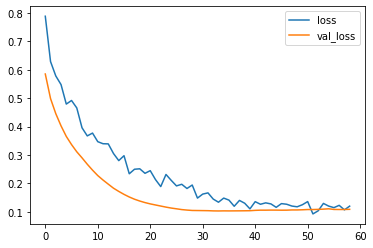

In [23]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [24]:
ypred=model.predict(xtest)
ypred=ypred>0.5

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

